# 分布の作図

- 執筆期間：2022/01/26 - 2022/01/26

In [1]:
# 更新日時を出力
import datetime
now = datetime.datetime.now()
print('更新日時：' + '{0:%Y-%m-%d %H:%M}'.format(now))

更新日時：2022-01-26 18:19


# ポアソン分布

　ポアソン分布(Poisson Distribution)の計算と作図を行います。  
<br>

　利用するライブラリを読み込みます。

In [2]:
# 利用するライブラリ
import numpy as np
from scipy.stats import poisson # ポアソン分布
from scipy.special import gamma, loggamma # ガンマ関数, 対数ガンマ関数
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

　分布の変化をアニメーション(gif画像)で確認するのに`matplotlib`ライブラリの`animation`モジュールを利用します。不要であれば省略してください。  
<br>

## 定義式の確認

　まずは、ポアソン分布の定義式を確認します。  
<br>

　ポアソン分布は、次の式で定義されます。

$$
\mathrm{Poi}(x | \lambda)
    = \frac{\lambda^x}{x!}
      e^{-\lambda}
$$

　ここで、$x$は単位時間における事象の発生回数、$\lambda$は発生回数の期待値です。  
　確率変数の値$x$は0以上の整数となります。パラメータ$\lambda$は、$\lambda > 0$を満たす必要があります。  

　この式の対数をとると、次の式になります。

$$
\log \mathrm{Poi}(x | \lambda)
    = x \log \lambda
      - \log x!
      - \lambda
$$

　ポアソン分布の平均と分散は、どちらもパラメータ$\lambda$になります。

$$
\begin{aligned}
\mathbb{E}[x]
   &= \lambda
\\
\mathbb{V}[x]
   &= \lambda
\end{aligned}
$$

<br>

## 確率の計算

　ポアソン分布に従う確率を計算する方法をいくつか確認します。  
<br>

　パラメータを設定します。

In [3]:
# パラメータを指定
lmd = 4.0

# 確率変数の値を指定
x = 2.0

　ポアソン分布のパラメータ$\lambda > 0$、確率変数がとり得る値(非負の整数)$x$を指定します。設定した値に従う確率を計算します。`lambda`は予約語のため変数名として使えないので`lmd`とします。  

　まずは、定義式から確率を計算します。

In [4]:
# 定義式により確率を計算
prob = lmd**x / gamma(x + 1.0) * np.exp(-lmd)
print(prob)

0.14652511110987343


　ポアソン分布の定義式

$$
\mathrm{Poi}(x | \lambda)
    = \frac{\lambda^x}{x!}
      \exp(-\lambda)
$$

で計算します。  
　階乗$x!$の計算は、ガンマ関数$\Gamma(x + 1) = x!$に置き換えて計算します。ガンマ関数は、`SciPy`ライブラリの`special`モジュールの`gamma()`で計算できます。  

　対数をとった定義式から計算します。

In [5]:
# 対数をとった定義式により確率を計算
log_prob = x * np.log(lmd) - loggamma(x + 1.0) - lmd
prob = np.exp(log_prob)
print(prob, log_prob)

0.14652511110987343 -1.9205584583201643


　対数をとった定義式

$$
\log \mathrm{Poi}(x | \lambda)
    = x \log \lambda
      - \log x!
      - \lambda
$$

を計算します。計算結果の指数をとると確率が得られます。

$$
\mathrm{Poi}(x | \lambda)
    = \exp \Bigl(
          \log \mathrm{Poi}(x | \lambda)
      \Bigr)
$$

　指数と対数の性質より$\exp(\log x) = x$です。  

　次は、`SciPy`ライブラリのモジュールを使って確率を計算します。  
　ポアソン分布のモジュール`poisson`の確率メソッド`pmf()`を使って計算します。

In [6]:
# ポアソン分布の関数により確率を計算
prob = poisson.pmf(k=x, mu=lmd)
print(prob)

0.14652511110987343


　変数の引数`k`に`x`、パラメータの引数`mu`に`lmd`を指定します。  

　`logpmf()`だと対数をとった確率を計算します。

In [7]:
# ポアソン分布の対数をとった関数により確率を計算
log_prob = poisson.logpmf(k=x, mu=lmd)
prob = np.exp(log_prob)
print(prob, log_prob)

0.14652511110987343 -1.9205584583201643


　計算結果の指数をとると確率が得られます。  
<br>

## 統計量の計算

　ポアソン分布の平均と分散を計算します。  
<br>

　平均を計算します。

In [8]:
# 計算式により平均を計算
E_x = lmd
print(E_x)

4.0


　ポアソン分布の平均は$\lambda$です。

$$
\mathbb{E}[x]
    = \lambda
$$

　分散を計算します。

In [9]:
# 計算式により分散を計算
V_x = lmd
print(V_x)

4.0


　ポアソン分布の分散も$\lambda$です。

$$
\mathbb{V}[x]
    = \lambda
$$

　ポアソン分布のモジュールの平均メソッド`mean()`でも平均を計算できます。

In [10]:
# ポアソン分布の関数により平均を計算
E_x = poisson.mean(mu=lmd)
print(E_x)

4.0


　確率メソッドと同様に引数を指定します。  

　分散メソッド`var()`で分散を計算します。

In [11]:
# ポアソン分布の関数により分散を計算
V_x = poisson.var(mu=lmd)
print(V_x)

4.0


　こちらも同様に引数を指定します。  
<br>

## 分布の可視化

　`Matplotlib`ライブラリの`PyPlot`モジュールを利用してポアソン分布のグラフを作成します。  
<br>

　ポアソン分布の確率変数がとり得る値$x$ごとの確率を計算します。

In [12]:
# パラメータを指定
lmd = 4.0

# 作図用のxの点を作成
x_vals = np.arange(np.ceil(lmd) * 4.0)

# ポアソン分布を計算
probability = poisson.pmf(k=x_vals, mu=lmd)

　$x$がとり得る値を作成して`x_vals`とします。この例では、`0`から`lmd`の`4`倍を範囲とします。ただし、$x$は0以上の整数なので、`np.ceil()`で`lmd`を切り上げて使います。  
　`x_vals`の各要素に対応する確率を求めます。  

　ポアソン分布のグラフを作成します。

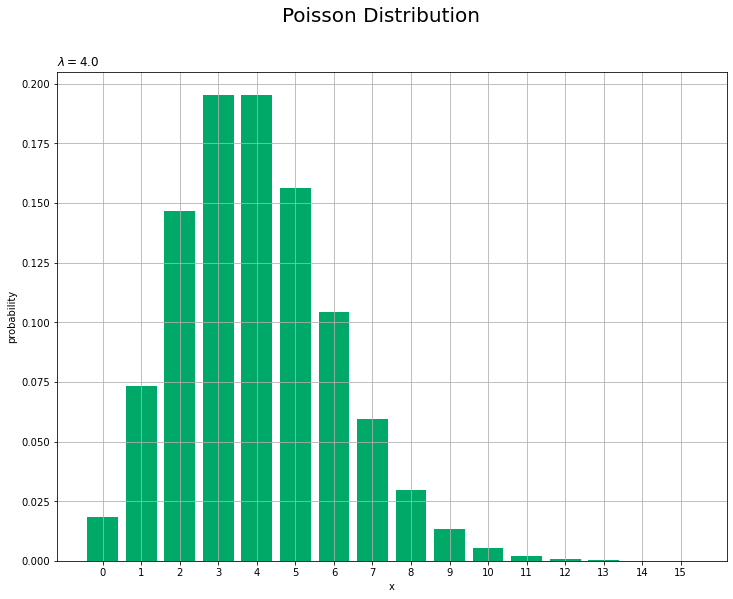

In [13]:
# ポアソン分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.bar(x=x_vals, height=probability, color='#00A968') # 棒グラフ
plt.xlabel('x') # x軸ラベル
plt.ylabel('probability') # y軸ラベル
plt.suptitle('Poisson Distribution', fontsize=20) # 全体のタイトル
plt.title('$\lambda=' + str(lmd) + '$', loc='left') # タイトル
plt.xticks(ticks=x_vals) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画

<br>

　この分布に平均と標準偏差を重ねて表示します。

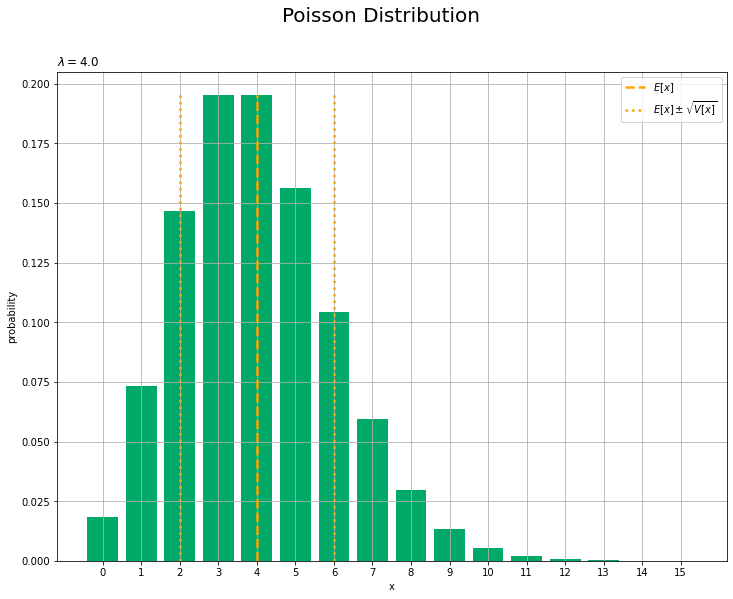

In [14]:
# 統計量を計算
E_x = lmd
s_x = np.sqrt(lmd)

# 統計量を重ねたポアソン分布を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.bar(x=x_vals, height=probability, color='#00A968') # 分布
plt.vlines(x=E_x, ymin=0.0, ymax=probability.max(), color='orange', linewidth=2.5, linestyle='--', label='$E[x]$') # 平均
plt.vlines(x=E_x - s_x, ymin=0.0, ymax=probability.max(), color='orange', linewidth=2.5, linestyle=':', label='$E[x] \pm \\sqrt{V[x]}$') # 平均 - 標準偏差
plt.vlines(x=E_x + s_x, ymin=0.0, ymax=probability.max(), color='orange', linewidth=2.5, linestyle=':') # 平均 + 標準偏差
plt.xlabel('x') # x軸ラベル
plt.ylabel('probability') # y軸ラベル
plt.suptitle('Poisson Distribution', fontsize=20)# 全体のタイトル
plt.title('$\lambda=' + str(lmd) + '$', loc='left') # タイトル
plt.xticks(ticks=x_vals) # x軸目盛
plt.legend() # 凡例
plt.grid() # グリッド線
plt.show() # 描画

　平均(破線)となる確率が最大なのを確認できます。また、点線で平均を中心に標準偏差の範囲を示しています。  

　ポアソン分布のグラフを描画できました。  
<br>

## パラメータと分布の形状の関係

　パラメータが及ぼす分布への影響をアニメーション(gif画像)で可視化します。  
<br>

　パラメータ$\lambda$の値を少しずつ変更して、分布の変化をアニメーションで確認します。

MovieWriter ffmpeg unavailable; using Pillow instead.


101


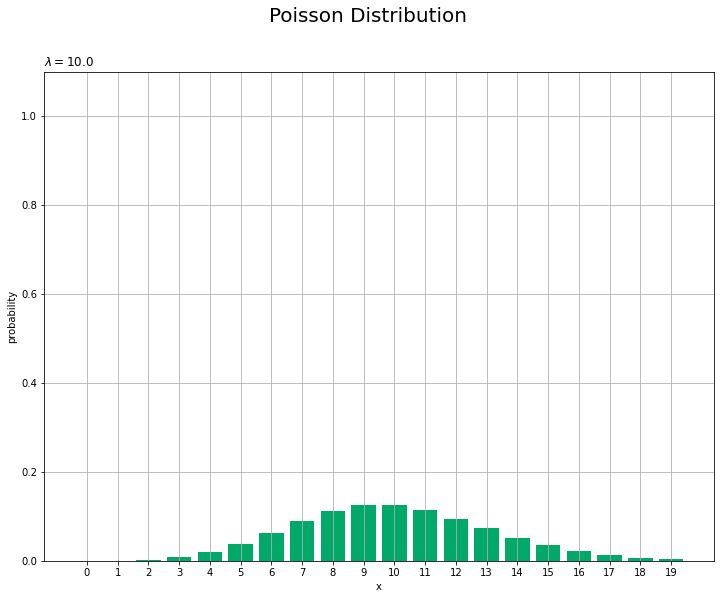

In [15]:
# lambdaとして利用する値を指定
lambda_vals = np.arange(start=0.0, stop=10.1, step=0.1)
print(len(lambda_vals)) # フレーム数

# 作図用のxの点を作成
x_vals = np.arange(np.ceil(lambda_vals.max()) * 2.0)

# y軸(確率)の最大値を設定
prob_max = np.max(poisson.pmf(k=x_vals, mu=lambda_vals.min())) + 0.1
#prob_max = 0.5

# 図を初期化
fig = plt.figure(figsize=(12, 9)) # 図の設定
fig.suptitle('Poisson Distribution', fontsize=20)# 全体のタイトル

# 作図処理を関数として定義
def update(i):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # i回目のパラメータを取得
    lmd = lambda_vals[i]
    
    # ポアソン分布を計算
    probability = poisson.pmf(k=x_vals, mu=lmd)
    
    # ポアソン分布を作図
    plt.bar(x=x_vals, height=probability, color='#00A968') # 棒グラフ
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('probability') # y軸ラベル
    plt.title('$\lambda=' + str(np.round(lmd, 1)) + '$', loc='left') # タイトル
    plt.xticks(ticks=x_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(ymin=0.0, ymax=prob_max) # y軸の表示範囲

# gif画像を作成
anime_prob = FuncAnimation(fig, update, frames=len(lambda_vals), interval=100)

# gif画像を保存
anime_prob.save('../figure/Python/Poisson_prob.gif')

　$\lambda$がとり得る値を作成して`lambda_vals`とします。  
　`lambda_vals`の値ごとに作図します。  

　$\lambda$が大きくなるに従って、$x$が大きいほど確率が高くなる(山が右に移動する)のを確認できます。  
<br>

## 乱数の生成

　ポアソン分布の乱数を生成してヒストグラムを確認します。  
<br>

　パラメータを指定して、ポアソン分布に従う乱数を生成します。

In [16]:
# パラメータを指定
lmd = 4.0

# データ数(サンプルサイズ)を指定
N = 1000

# ポアソン分布に従う乱数を生成
x_n = np.random.poisson(lam=lmd, size=N)
print(x_n[:10])

[3 1 5 4 3 2 1 6 2 5]


　ポアソン分布の乱数は、`NumPy`ライブラリの`random`モジュールのポアソン分布の乱数生成関数`np.random.poisson()`で生成できます。パラメータの引数`lam`に`lmd`、データ数(サンプルサイズ)の引数`size`に`N`を指定します。  

　サンプルを集計します。

In [17]:
# 作図用のxの点を作成
x_vals = np.arange(x_n.max() + 5.0)
print(x_vals[:10])

# 乱数を集計
frequency = np.array([np.sum(x_n == m) for m in x_vals])
print(frequency[:10])

# ポアソン分布を計算
probability = poisson.pmf(k=x_vals, mu=lmd)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 11  80 140 208 210 145 103  57  22  14]


　`x_n`に含まれる値が`m`の要素数は、`np.sum(x_n == m)`で得られます。  
　リスト内包表記を用いて、`x_vals`の全ての要素をカウントして配列に格納します。  

　ヒストグラムを作成します。

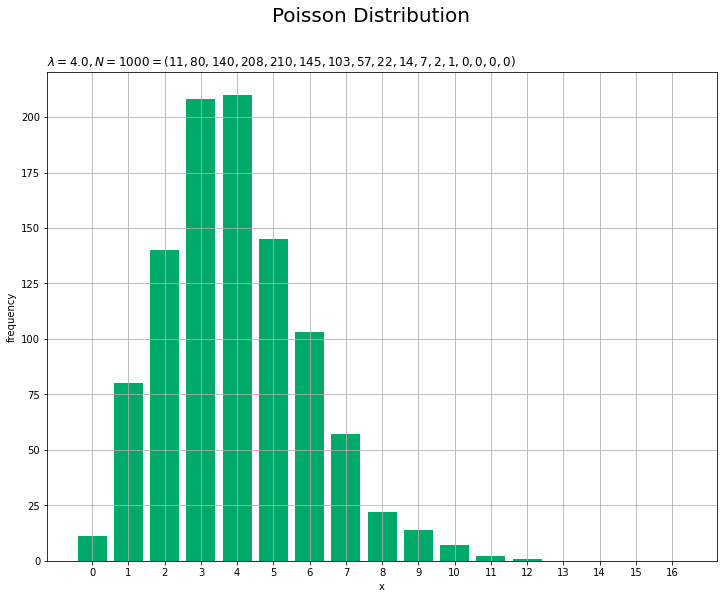

In [18]:
# サンプルのヒストグラムを作成
plt.figure(figsize=(12, 9)) # 図の設定
plt.bar(x=x_vals, height=frequency, color='#00A968') # ヒストグラム
plt.xlabel('x') # x軸ラベル
plt.ylabel('frequency') # y軸ラベル
plt.suptitle('Poisson Distribution', fontsize=20)# 全体のタイトル
plt.title('$\lambda=' + str(lmd) + ', N=' + str(N) + 
          '=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
plt.xticks(ticks=x_vals) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画

<br>

　構成比を分布に重ねて描画します。

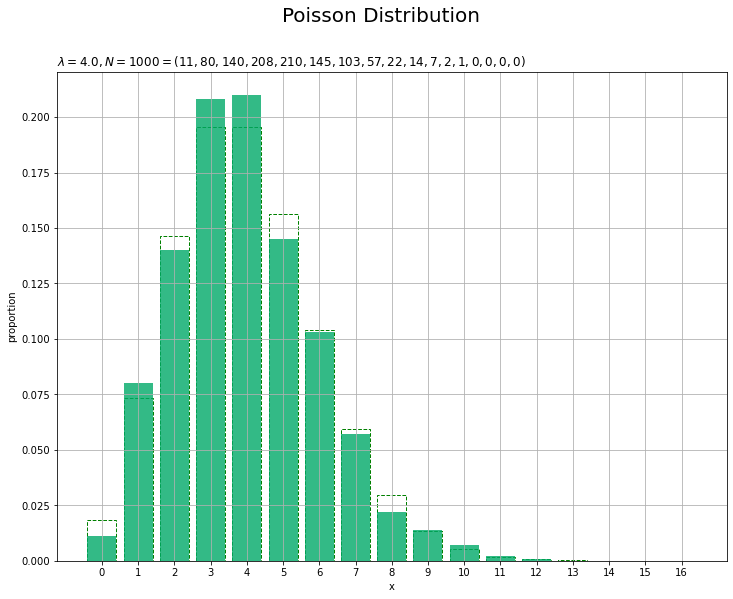

In [19]:
# サンプルの構成比を作図
plt.figure(figsize=(12, 9)) # 図の設定
plt.bar(x=x_vals, height=probability, color='white', edgecolor='green', linestyle='--') # 元の分布
plt.bar(x=x_vals, height=frequency / N, color='#00A968', alpha=0.8) # 構成比
plt.xlabel('x') # x軸ラベル
plt.ylabel('proportion') # y軸ラベル
plt.suptitle('Poisson Distribution', fontsize=20)# 全体のタイトル
plt.title('$\lambda=' + str(lmd) + ', N=' + str(N) + 
          '=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
plt.xticks(ticks=x_vals) # x軸目盛
plt.grid() # グリッド線
plt.show() # 描画

　頻度`frequency`をデータ数`N`で割り、各値の構成比を計算します。  

　データ数が十分に増えると元の分布(破線のグラフ)のグラフに形が近づきます。  
<br>

　サンプルサイズとヒストグラムの変化をアニメーションで確認します。乱数を1つずつ取り出して作図します。  

　ヒストグラムのアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


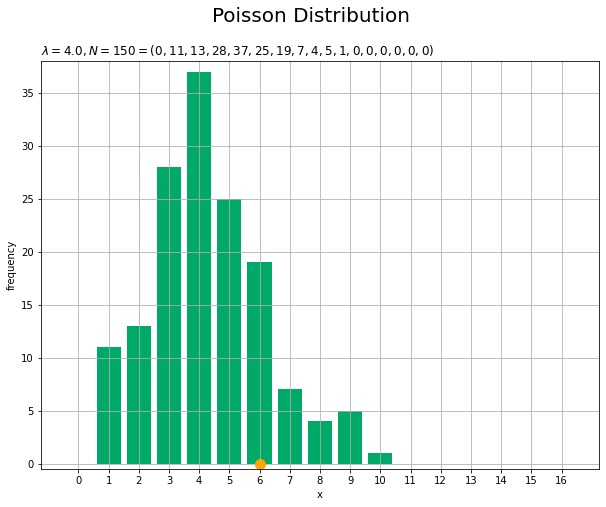

In [20]:
# フレーム数を指定
N_frame = 150

# 図を初期化
fig = plt.figure(figsize=(10, 7.5)) # 図の設定
fig.suptitle('Poisson Distribution', fontsize=20)# 全体のタイトル

# y軸(頻度)の最大値を設定
freq_max = np.max([np.sum(x_n[:N_frame] == m) for m in x_vals]) + 1.0

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個の乱数を集計
    frequency = np.array([np.sum(x_n[:(n+1)] == m) for m in x_vals])
    
    # サンプルのヒストグラムを作成
    plt.bar(x=x_vals, height=frequency, color='#00A968', zorder=1) # ヒストグラム
    plt.scatter(x=x_n[n], y=0.0, s=100, c='orange', zorder=2) # サンプル
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('frequency') # y軸ラベル
    plt.title('$\lambda=' + str(lmd) + ', N=' + str(n + 1) + 
              '=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
    plt.xticks(ticks=x_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(ymin=-0.5, ymax=freq_max) # y軸の表示範囲

# gif画像を作成
anime_freq = FuncAnimation(fig, update, frames=N_frame, interval=100)

# gif画像を保存
anime_freq.save('../figure/Python/Poisson_freq.gif')

<br>

　構成比のアニメーションを作成します。

MovieWriter ffmpeg unavailable; using Pillow instead.


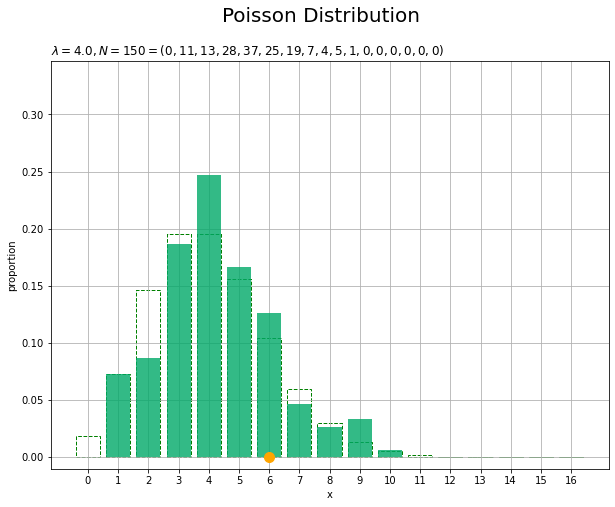

In [21]:
## アニメーションによる可視化:(構成比)

# フレーム数を指定
N_frame = 150

# 図を初期化
fig = plt.figure(figsize=(10, 7.5)) # 図の設定
fig.suptitle('Poisson Distribution', fontsize=20)# 全体のタイトル

# y軸(割合)の最大値を設定
prop_max = np.max([np.sum(x_n[:N_frame] == m) for m in x_vals]) / N_frame + 0.1

# 作図処理を関数として定義
def update(n):
    # 前フレームのグラフを初期化
    plt.cla()
    
    # n個の乱数を集計
    frequency = np.array([np.sum(x_n[:(n+1)] == m) for m in x_vals])
    
    # サンプルのヒストグラムを作成
    plt.bar(x=x_vals, height=probability, color='white', edgecolor='green', linestyle='--', zorder=1) # 元の分布
    plt.bar(x=x_vals, height=frequency / (n + 1), color='#00A968', alpha=0.8, zorder=2) # 構成比
    plt.scatter(x=x_n[n], y=0.0, s=100, c='orange', zorder=3) # サンプル
    plt.xlabel('x') # x軸ラベル
    plt.ylabel('proportion') # y軸ラベル
    plt.title('$\lambda=' + str(lmd) + ', N=' + str(n + 1) + 
              '=(' + ', '.join([str(f) for f in frequency]) + ')$', loc='left') # タイトル
    plt.xticks(ticks=x_vals) # x軸目盛
    plt.grid() # グリッド線
    plt.ylim(ymin=-0.01, ymax=prop_max) # y軸の表示範囲

# gif画像を作成
anime_prop = FuncAnimation(fig, update, frames=N_frame, interval=100)

# gif画像を保存
anime_prop.save('../figure/Python/Poisson_prop.gif')

　サンプルが増えるに従って、元の分布に近付くのを確認できます。  
<br>